<a href="https://colab.research.google.com/github/Par3lll/calculator/blob/main/PAPER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas scikit-learn

In [17]:
from google.colab import files


uploaded = files.upload()


Saving dinkes_5-od_17107_jumlah_balita_berdasarkan_kategori_balita_gizi_buruk_data.csv to dinkes_5-od_17107_jumlah_balita_berdasarkan_kategori_balita_gizi_buruk_data.csv


In [30]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X = load_data("/content/dinkes_5-od_17107_jumlah_balita_berdasarkan_kategori_balita_gizi_buruk_data.csv")

In [31]:
# Function to preprocess the data
def preprocess_data(df):
    X = df.drop(['id', 'nama_provinsi', 'nama_kabupaten_kota', 'satuan'], axis=1)

    # Identify numerical and categorical columns
    numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    # Create a column transformer with pipelines for numerical and categorical data
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='mean')),
                ('scaler', StandardScaler())
            ]), numerical_features),
            ('cat', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))
            ]), categorical_features)
        ]
    )

    # Apply transformations
    X_processed = preprocessor.fit_transform(X)

    return X_processed

In [32]:
# Function to apply K-Means clustering
def apply_kmeans(X, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X)
    return clusters, kmeans

In [33]:
# Function to apply DBSCAN clustering
def apply_dbscan(X, eps=0.5, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(X)
    return clusters, dbscan

In [43]:
# Function to visualize clustering results
def visualize_clusters(X, clusters, kmeans):
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)

    plt.figure(figsize=(10, 6))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', marker='o')
    plt.title(f'{DBSCAN} Clustering')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar()
    plt.show(visualize_clusters)

In [9]:
# Main function to run the whole process
def main(file_path):
    df = load_data(file_path)
    X = preprocess_data(df)

    kmeans_clusters, kmeans_model = apply_kmeans(X, n_clusters=3)
    dbscan_clusters, dbscan_model = apply_dbscan(X, eps=0.5, min_samples=5)

    visualize_clusters(X, kmeans_clusters, 'K-Means')
    visualize_clusters(X, dbscan_clusters, 'DBSCAN')

In [10]:
# Specify the path to your CSV file
file_path = '/mnt/data/dinkes_5-od_17107_jumlah_balita_berdasarkan_kategori_balita_gizi_buruk_data.csv'

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


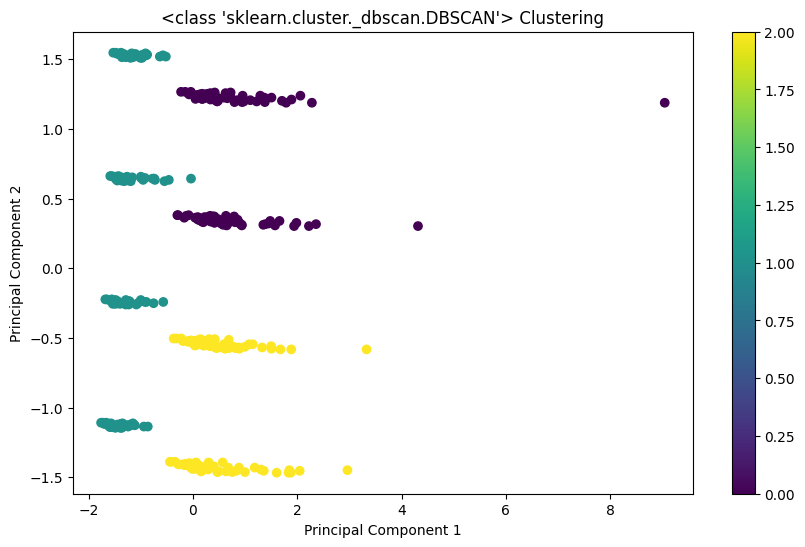

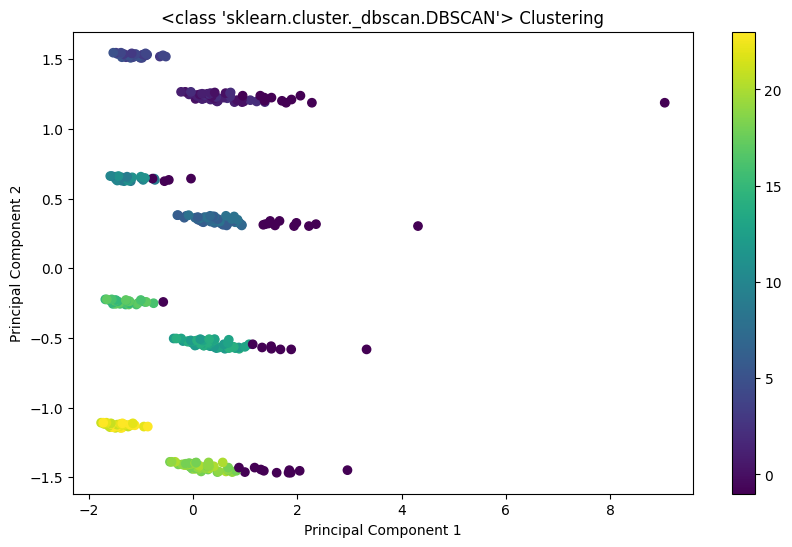

In [44]:
# Run the main function
if __name__ == "__main__":
    main("/content/dinkes_5-od_17107_jumlah_balita_berdasarkan_kategori_balita_gizi_buruk_data.csv")